In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

In [3]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.describe()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


## #1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

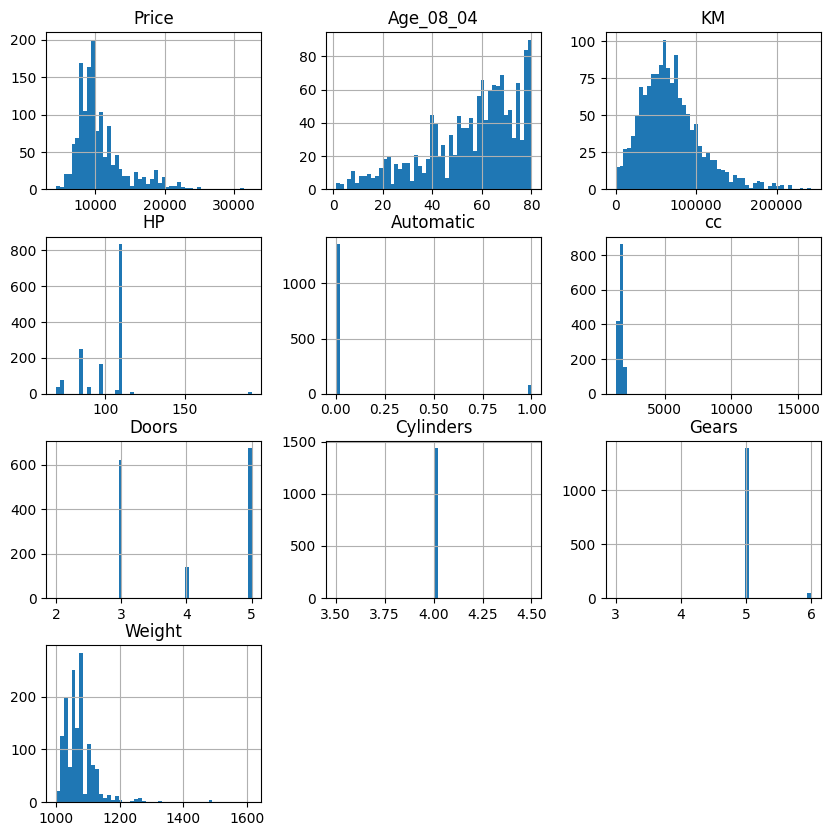

In [6]:
# Visualizations of the variables
df.hist(bins=50, figsize=(10, 10))
plt.show()

In [7]:
# Convert 'Fuel_Type' column to numerical representation using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'])

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                     Price  Age_08_04        KM        HP  Automatic  \
Price             1.000000  -0.876590 -0.569960  0.314990   0.033081   
Age_08_04        -0.876590   1.000000  0.505672 -0.156622   0.031717   
KM               -0.569960   0.505672  1.000000 -0.333538  -0.081854   
HP                0.314990  -0.156622 -0.333538  1.000000   0.013144   
Automatic         0.033081   0.031717 -0.081854  0.013144   1.000000   
cc                0.126389  -0.098084  0.102683  0.035856   0.066740   
Doors             0.185326  -0.148359 -0.036197  0.092424  -0.027654   
Cylinders              NaN        NaN       NaN       NaN        NaN   
Gears             0.063104  -0.005364  0.015023  0.209477  -0.098555   
Weight            0.581198  -0.470253 -0.028598  0.089614   0.057249   
Fuel_Type_CNG    -0.039536   0.002389  0.144016  0.062109   0.001486   
Fuel_Type_Diesel  0.054084  -0.097740  0.403060 -0.533453  -0.084490   
Fuel_Type_Petrol -0.038516   0.092611 -0.433160  0.489110   0.08

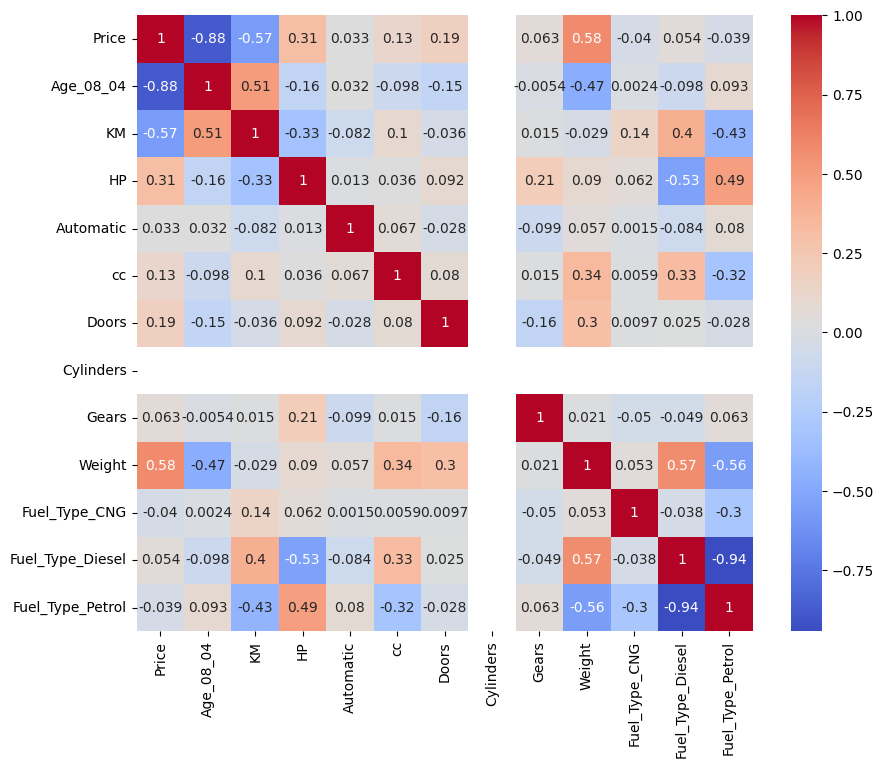

In [8]:
# Heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

#2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [9]:
# **Task 2: Splitting the dataset**

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models

In [10]:
# **Task 3: Building multiple linear regression models**

# Model 1
X_train_model1 = X_train[['Age_08_04', 'KM', 'HP', 'cc','Doors', 'Weight']] # Changed 'Age' to 'Age_08_04' and 'CC' to 'cc'
model1 = LinearRegression()
model1.fit(X_train_model1, y_train)

LinearRegression()

In [11]:
# Model 2
X_train_model2 = X_train[['Age_08_04', 'cc','KM','HP', 'Doors','Weight']]
model2 = LinearRegression()
model2.fit(X_train_model2, y_train)

LinearRegression()

In [12]:
# Model 3
X_train_model3 = X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors','Weight']]
model3 = LinearRegression()
model3.fit(X_train_model3, y_train)

LinearRegression()

Task 4: Evaluating the Performance of the Models

In [13]:
# Evaluate the models using Mean Squared Error (MSE) and R-squared
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Create a DataFrame with the same columns as used to train model1
X_test_model1 = X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']]

In [15]:
y_pred_model1 = model1.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])
# Ensure the order of columns used for prediction matches the order used during training
y_pred_model2 = model2.predict(X_test[X_train_model2.columns]) # Use the same features & order as in the training data for model2
y_pred_model3 = model3.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])

In [16]:
# Ensure that y_pred1, y_pred2, and y_pred3 have been assigned values prior to this code block
# For example:
# y_pred1 = [1, 2, 3] # Replace with the actual predicted values from model1

# Assuming you have model1, model2, and model3 defined and X_test available
y_pred1 = model1.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']]) # Predict using model1
y_pred2 = model2.predict(X_test[X_train_model2.columns]) # Predict using model2
y_pred3 = model3.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']]) # Predict using model3


mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)

In [17]:
# Calculate R-squared for each model
r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred3)

print('Model 1: MSE = {:.2f}, R-squared = {:.2f}'.format(mse1, r2_1))
print('Model 2: MSE = {:.2f}, R-squared = {:.2f}'.format(mse2, r2_2))
print('Model 3: MSE = {:.2f}, R-squared = {:.2f}'.format(mse3, r2_3))


Model 1: MSE = 1993231.29, R-squared = 0.85
Model 2: MSE = 1993231.29, R-squared = 0.85
Model 3: MSE = 1993231.29, R-squared = 0.85


Task 5: Lasso and Ridge Regressio

In [18]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

Normalization
Normalization refers to the process of rescaling data into a fixed range, typically between 0 and 1. The formula for min-max normalization is:

𝑋
𝑛
𝑜
𝑟
𝑚
=
𝑋
−
𝑋
𝑚
𝑖
𝑛
𝑋
𝑚
𝑎
𝑥
−
𝑋
𝑚
𝑖
𝑛
X
norm
​
 =
X
max
​
 −X
min
​

X−X
min
​

​

X: Original value
X_min: Minimum value in the dataset
X_max: Maximum value in the dataset
Use Cases
Works well when the distribution of data is unknown or non-Gaussian.
Useful for algorithms sensitive to the magnitude of data, like K-Nearest Neighbors (KNN) or Neural Networks.
Example
Imagine you have two features, one ranging from 0 to 1000 and another from 0 to 5. Without normalization, features with larger ranges can dominate the learning process, making the model biased.

Standardization
Standardization transforms data so that it has a mean of 0 and a standard deviation of 1. The formula for standardization is:

𝑋
𝑠
𝑡
𝑑
=
𝑋
−
𝜇
𝜎
X
std
​
 =
σ
X−μ
​

X: Original value
μ: Mean of the feature
σ: Standard deviation of the feature
Use Cases
Typically used when the data follows a Gaussian (normal) distribution.
Suitable for models like linear regression, logistic regression, SVM, and PCA, where data is assumed to be normally distributed or centered around zero.
Example
If the features have different units or distributions, standardizing ensures that the model treats all features equally, avoiding biases.



2.What techniques can be used to address multicollinearity in multiple linear regression?

Below are some key techniques to address multicollinearity:

1. Remove One of the Highly Correlated Variables
Why it works: If two variables are highly correlated, they provide almost the same information. Dropping one of the correlated variables can help reduce multicollinearity.

How to do it: Calculate the correlation matrix to identify pairs of highly correlated variables. Drop one from each correlated pair.

Example: If two variables X1 and X2 have a correlation coefficient close to 1 (e.g., 0.95), remove one of them.

2. Combine Correlated Variables
Why it works: In some cases, you can combine correlated variables into a single feature that captures the shared information without introducing multicollinearity.

How to do it: Create a composite index or use techniques like Principal Component Analysis (PCA) or Factor Analysis to combine multiple correlated variables into a single variable.

Example: If X1 and X2 are correlated, you can create a new variable X_combined = X1 + X2.

3. Lasso Regression (L1 Regularization)
Why it works: Lasso regression not only reduces coefficients like ridge regression but also forces some of them to be exactly zero. This way, it can eliminate less important features, thus addressing multicollinearity.

How to do it: Use the Lasso regression model, which adds a regularization term
𝜆
∑
∣
𝛽
𝑖
∣
λ∑∣β
i
​
 ∣ to the cost function.

Example:

Lasso Cost Function:
𝐽
(
𝜃
)
=
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
+
𝜆
∑
𝑗
=
1
𝑝
∣
𝜃
𝑗
∣
Lasso Cost Function: J(θ)=
i=1
∑
n
​
 (y
i
​
 −
y
^
​
  
i
​
 )
2
 +λ
j=1
∑
p
​
 ∣θ
j
​
 ∣
It automatically selects relevant variables by shrinking others to zero.

4. Ridge Regression (L2 Regularization)
Why it works: Ridge regression applies a penalty to large coefficients, shrinking them in proportion to the strength of multicollinearity. This helps to stabilize coefficient estimates.

How to do it: Use the Ridge regression model, which adds a regularization term
𝜆
∑
𝛽
𝑖
2
λ∑β
i
2
​
  to the cost function of linear regression.

Example:

Ridge Cost Function:
𝐽
(
𝜃
)
=
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
+
𝜆
∑
𝑗
=
1
𝑝
𝜃
𝑗
2
Ridge Cost Function: J(θ)=
i=1
∑
n
​
 (y
i
​
 −
y
^
​
  
i
​
 )
2
 +λ
j=1
∑
p
​
 θ
j
2
​

Here,
𝜆
λ controls the penalty's strength.